## Modelo Arbol de Clasificacion

Estudiante encargado:  Josue Rivera

### Importar librerias y cargar los datos de la primera parte

In [57]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Vectorización de texto
from sklearn.feature_extraction.text import TfidfVectorizer

# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib as mplt
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree
# Para la serialización del modelo
# Guardar modelo
import joblib, pickle

In [58]:
# Importar datos
db_route = 'sample_data/processed_data.csv'
df = pd.read_csv(db_route)

# Imprimir número de filas
print('Número de filas: ', df.shape[0])
# Imprimir número de columnas
print('Número de columnas: ', df.shape[1])
pd.set_option('display.max_columns', None) # Número máximo de columnas

df.sample(5)

Número de filas:  5000
Número de columnas:  2


,sentimiento,tokens
3627,1,los ochent produjeron un gran cantidad de pelu...
3737,1,esto siempr ha sido un de mis pelcula favorita...
4386,0,oh pilot men cal cockpit noth honey dialog lik...
2953,1,un docu conmov que pon un rostro humano en la ...
645,1,un peque encantador pelcul encantador par est ...


In [59]:
# Contar valores nulos
df.isnull().sum()

sentimiento    0
tokens         0
dtype: int64

#### Ahora separamos los datos de manera individual

In [60]:
# División entre variables independientes y dependientes
X = df['tokens']
Y = df['sentimiento']

In [70]:
# Vectorización de texto
vectorizer = TfidfVectorizer(max_df=1200, min_df=2, max_features=10000, ngram_range=(1,2))
X_count = vectorizer.fit_transform(X)
print(X_count.shape)

(5000, 10000)


In [74]:
# Separamos los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_count, Y, test_size=0.4, random_state=42)

### Implementacion del Modelo

In [75]:
#crea arbol
arbol = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [76]:
#entrena arbol
arbol = arbol.fit(X_train,Y_train)

In [77]:
y_pred = arbol.predict(X_test)

## evaluacion de modelo

In [78]:
#Predicción de la variable objetivo en función de la variable entrenada X en el modelo optimo

print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred,average='weighted')))
print("Precisión: {}".format(precision_score(Y_test,y_pred,average='weighted')))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred,average='weighted')))

Exactitud: 0.67
Recall: 0.67
Precisión: 0.6702959821553716
Puntuación F1: 0.6699059288339876


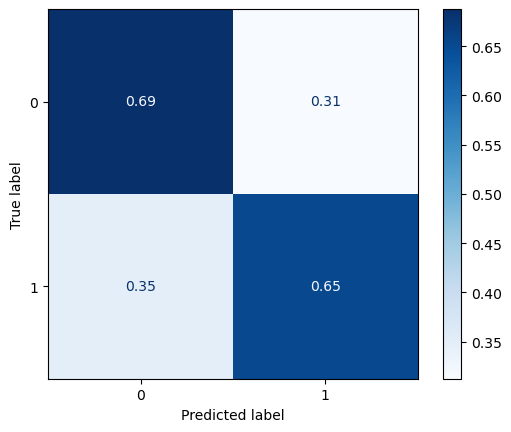

In [79]:
ConfusionMatrixDisplay.from_estimator(arbol, X_test, Y_test, cmap=plt.cm.Blues, normalize='true')

In [80]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       996
           1       0.68      0.65      0.66      1004

    accuracy                           0.67      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.67      0.67      0.67      2000



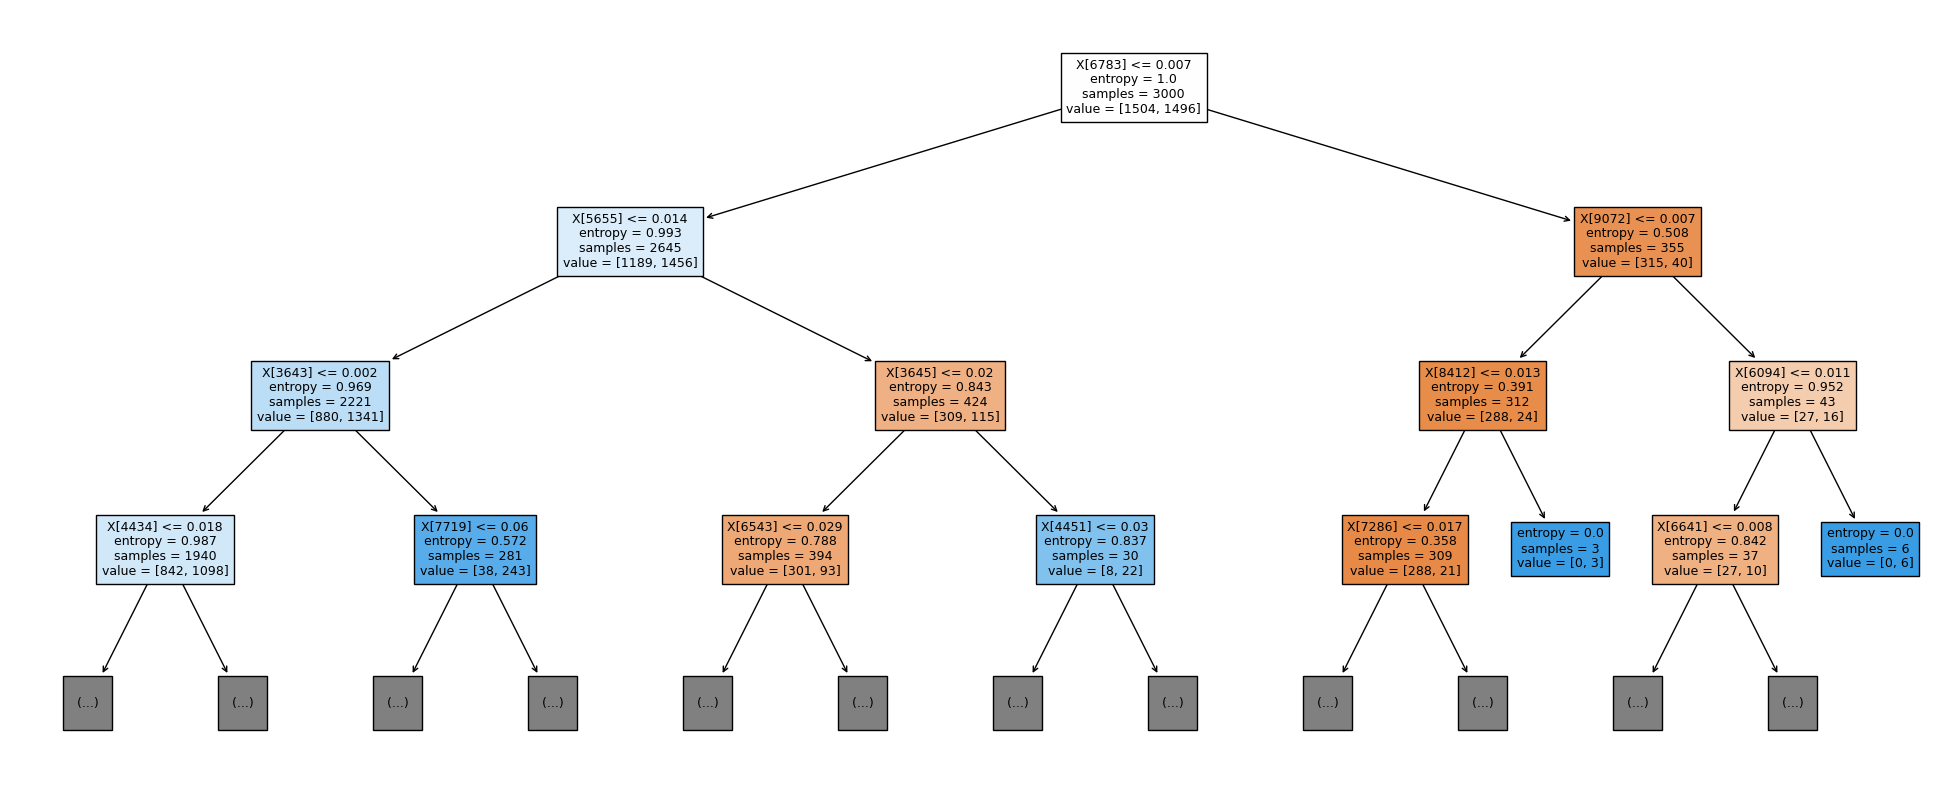

In [68]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=3, filled=True, fontsize=9)

In [69]:
# Exportar modelo con joblib
joblib.dump(arbol, 'sample_data/ClassificationDecisionTree.joblib')

# Exportar vectorizer con joblib
joblib.dump(vectorizer, 'sample_data/vectorizer_classificationTree.joblib')

['sample_data/vectorizer_classificationTree.joblib']